In [1]:
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#Importing Train dataset into Colab
data=pd.read_csv('./employee_data.csv')

In [3]:
data.duplicated().sum()
data[data.duplicated()]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
2558,126,temp,NaN,NaN,2,NaN,low,NaN,Left,NaN
3004,69,temp,NaN,NaN,2,NaN,low,NaN,Employed,NaN
3026,101,temp,NaN,NaN,1,NaN,medium,NaN,Employed,NaN
5023,125,temp,NaN,NaN,2,NaN,low,NaN,Employed,NaN
5504,85,temp,NaN,NaN,2,NaN,low,NaN,Employed,NaN
6037,76,temp,NaN,NaN,2,NaN,medium,NaN,Employed,NaN
6147,85,temp,NaN,NaN,2,NaN,low,NaN,Employed,NaN
6476,127,temp,NaN,NaN,2,NaN,medium,NaN,Left,NaN
6726,125,temp,NaN,NaN,2,NaN,medium,NaN,Employed,NaN
7295,131,temp,NaN,NaN,2,NaN,medium,NaN,Employed,NaN


Observation:

We can see that most of the dublicated rows caused due has Null values, so that are not really dublicated. So we wont remove them.

In [4]:
# Finding number of null values in individual column
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

Overall Observations Missing Value Analysis:

Below are colums with the missing values in our dataset:

1. department
2. filed_complaint
3. last_evaluation
4. recently_promoted
5. satisfaction
6. tenure
Let's plot the missing values.

avg_monthly_hrs       0.00
department            4.98
filed_complaint      85.56
last_evaluation      10.75
n_projects            0.00
recently_promoted    97.89
salary                0.00
satisfaction          1.27
status                0.00
tenure                1.27
dtype: float64


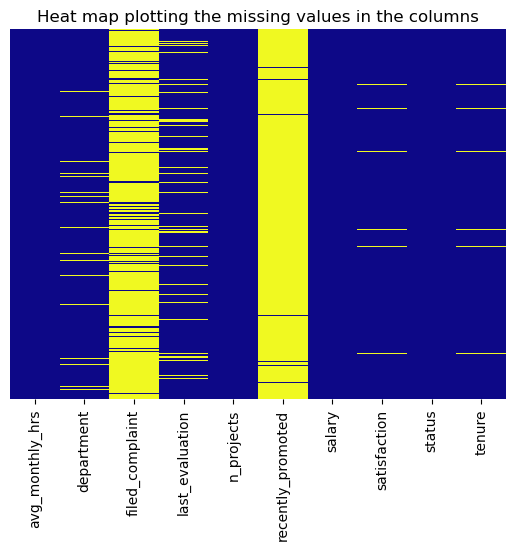

In [5]:
nullTable=round((data.isnull().sum()/data.shape[0])*100,2)
nullValueCols=pd.DataFrame(nullTable,columns=['Missing Value %'])
nullValueCols.reset_index(inplace=True)
nullValueCols.rename(columns={'index': 'Column Name'},inplace=True)
nullValueCols[nullValueCols['Missing Value %']!=0]
print(nullTable)

sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='plasma')
plt.title("Heat map plotting the missing values in the columns")
plt.show()

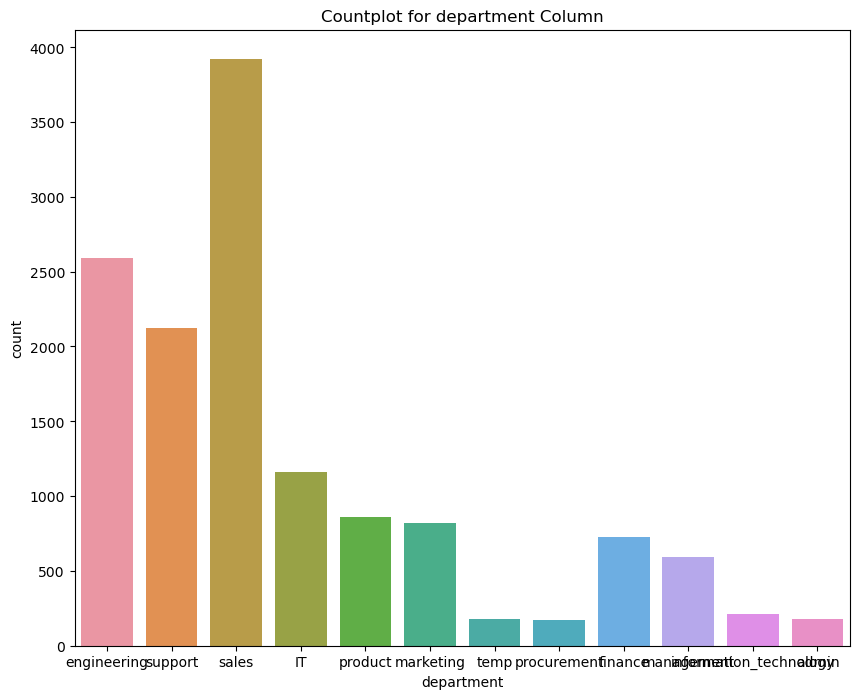

In [6]:
plt.figure(figsize = (10, 8))
Attrplot=sns.countplot(x = 'department', data = data)
plt.title("Countplot for department Column")
plt.show()

The department column is a categorial column and has diffrent types of departments. Some of the workers in the company does not have any department value, maybe they are not in specific department so we will create for them a new department type called 'other'.

In [7]:
# filling all null values with new department type 'other'
data['department'] = data['department'].fillna('other')

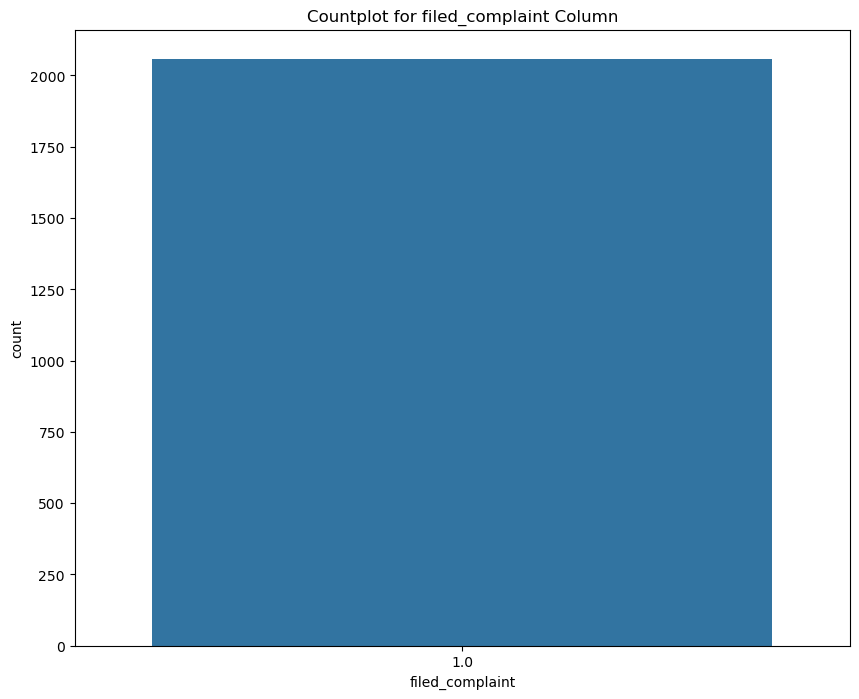

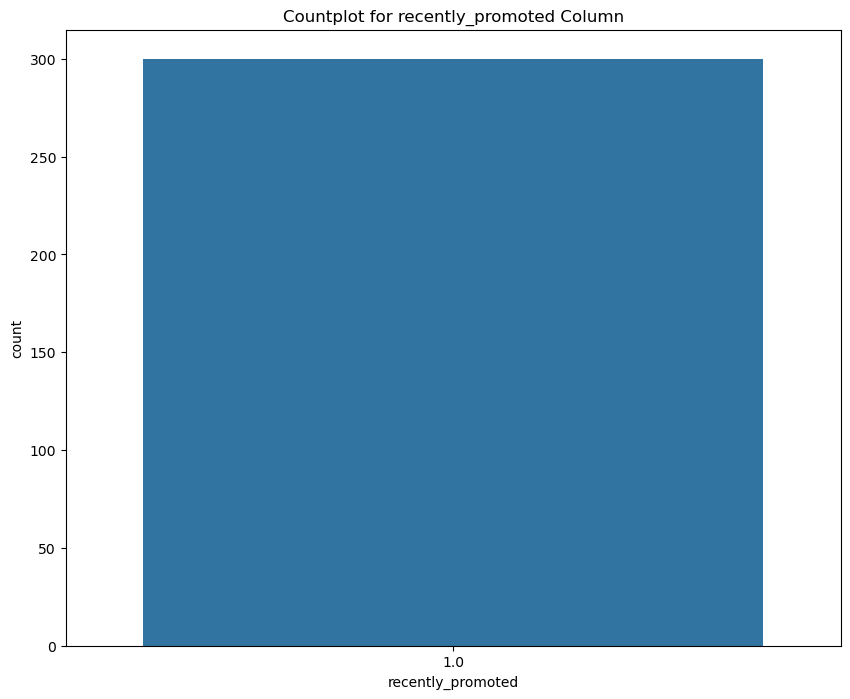

In [8]:
plt.figure(figsize = (10, 8))
Attrplot=sns.countplot(x = 'filed_complaint', data = data)
plt.title("Countplot for filed_complaint Column")
plt.show()

plt.figure(figsize = (10, 8))
Attrplot=sns.countplot(x = 'recently_promoted', data = data)
plt.title("Countplot for recently_promoted Column")
plt.show()

In [9]:
# filling all null values of filed_complaint and recently_promoted with 0
data['filed_complaint'] = data['filed_complaint'].fillna(0)
data['recently_promoted'] = data['recently_promoted'].fillna(0)

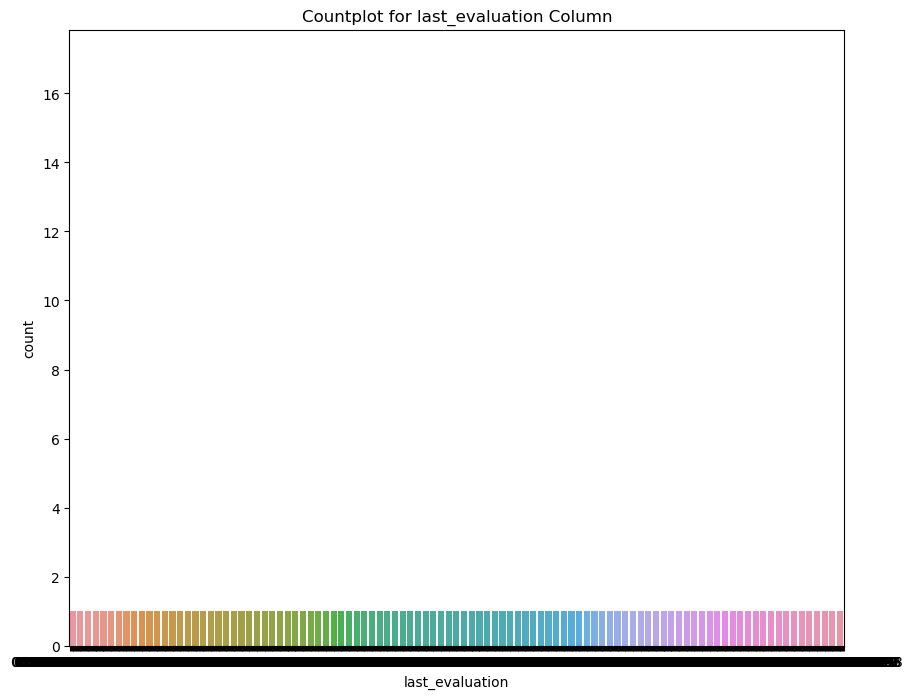

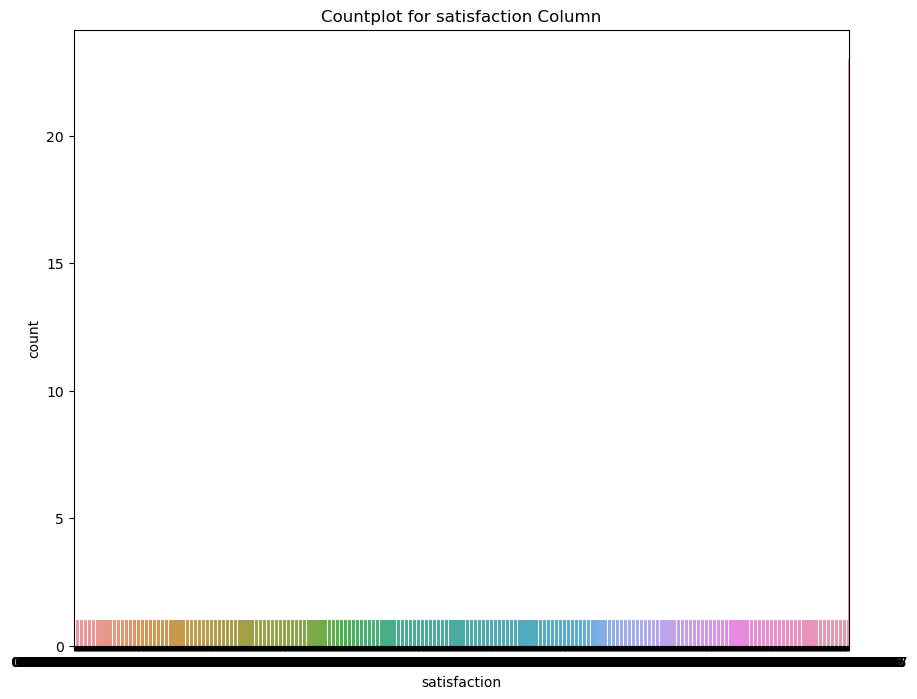

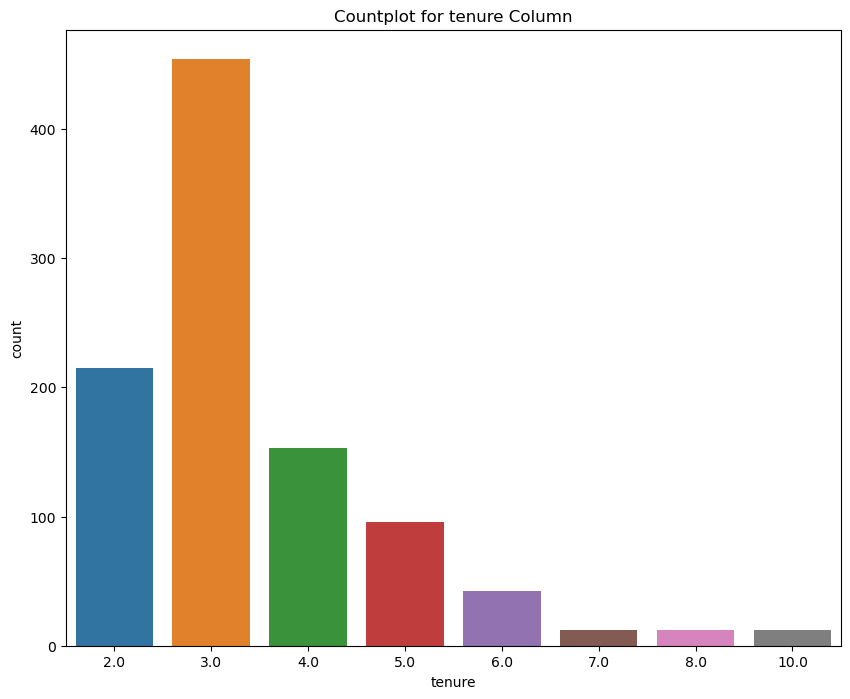

In [10]:
plt.figure(figsize = (10, 8))
Attrplot=sns.countplot(x = 'last_evaluation', data = data.sample(n=1000))
plt.title("Countplot for last_evaluation Column")
plt.show()

plt.figure(figsize = (10, 8))
Attrplot=sns.countplot(x = 'satisfaction', data = data.sample(n=1000))
plt.title("Countplot for satisfaction Column")
plt.show()

plt.figure(figsize = (10, 8))
Attrplot=sns.countplot(x = 'tenure', data = data.sample(n=1000))
plt.title("Countplot for tenure Column")
plt.show()

In [11]:
data['last_evaluation'] = data['last_evaluation'].fillna(data['last_evaluation'].mean())
data['satisfaction'] = data['satisfaction'].fillna(data['satisfaction'].mean())
data['tenure'] = data['tenure'].fillna(data['tenure'].mean())

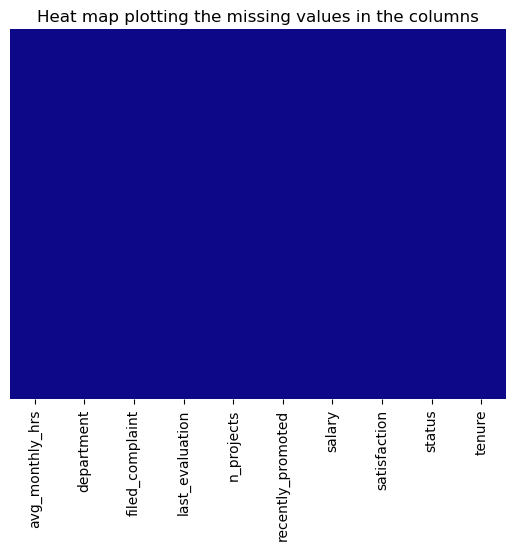

In [12]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='plasma')
plt.title("Heat map plotting the missing values in the columns")
plt.show()

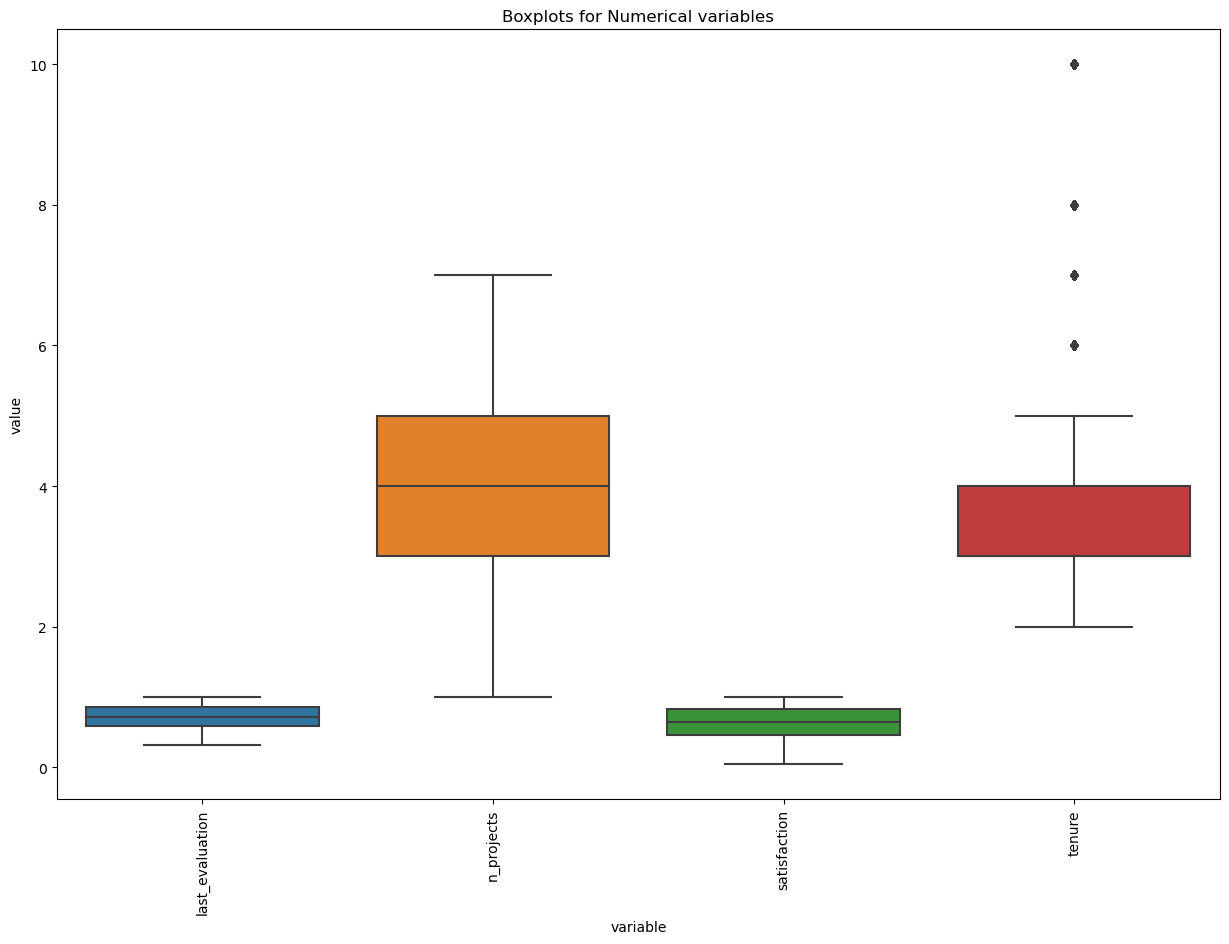

In [13]:
NewNumeric=data[['last_evaluation','n_projects','satisfaction','tenure']]
NewNumericMelt=NewNumeric.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=NewNumericMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

Observation:

We have some outliers in tenure column. Most the people stays in the company for 3-4 years. But some people are more than 6 years or even 10(maybe the founders). Let's check how much from the dataset this outliers represents:

In [14]:
100 * (data["tenure"] > 6).sum() / data.shape[0]

3.768685521791003

In [15]:
above6years = data[data['tenure'] > 6]
(above6years['status'] == 'Left').sum()

0

There are no people at the level that left the comapny. Since our goal is to find those people we will remove this outlier data becouse it wont have us quite.

In [16]:
# saving all the people who are working only less then 6 years
data = data[data['tenure'] < 6]

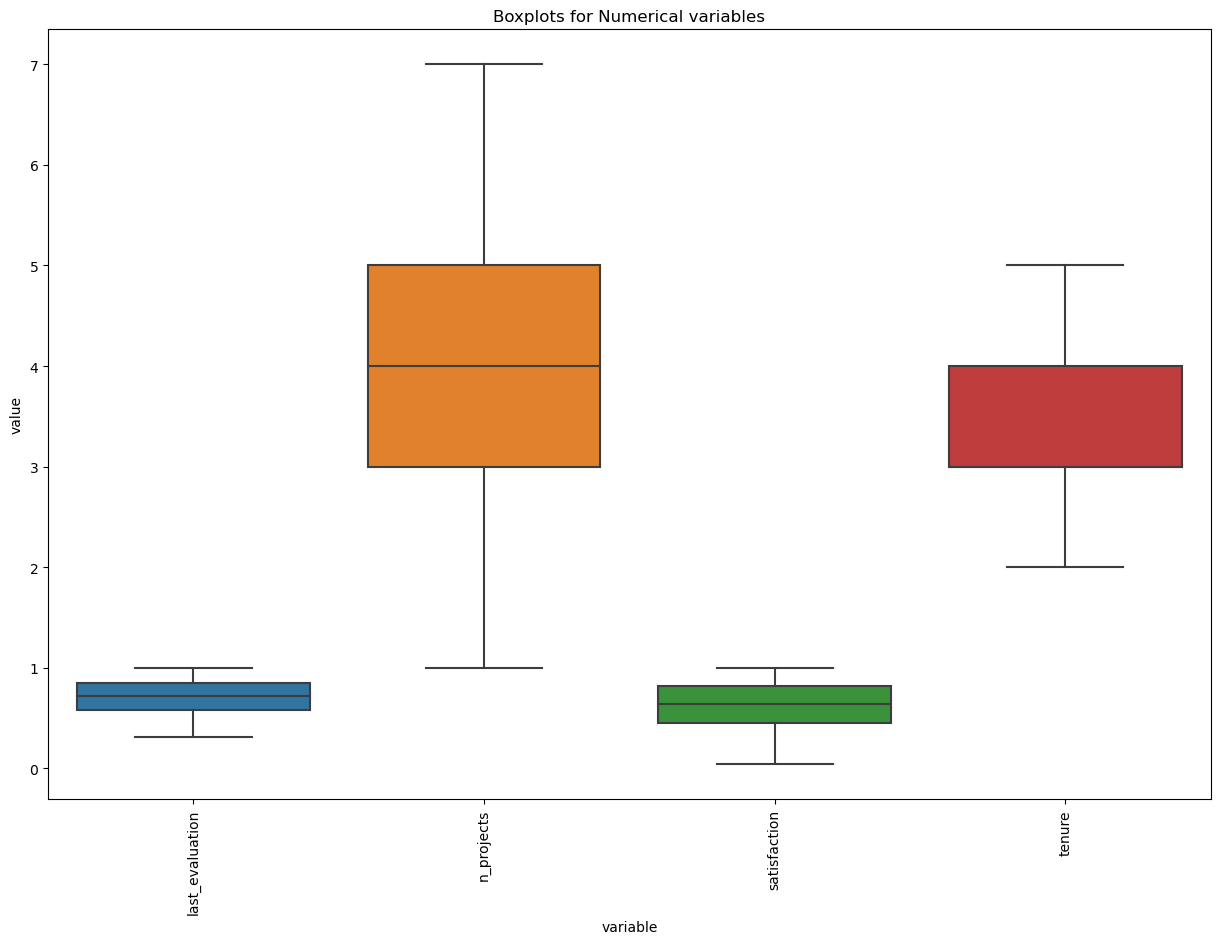

In [17]:
NewNumeric=data[['last_evaluation','n_projects','satisfaction','tenure']]
NewNumericMelt=NewNumeric.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=NewNumericMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

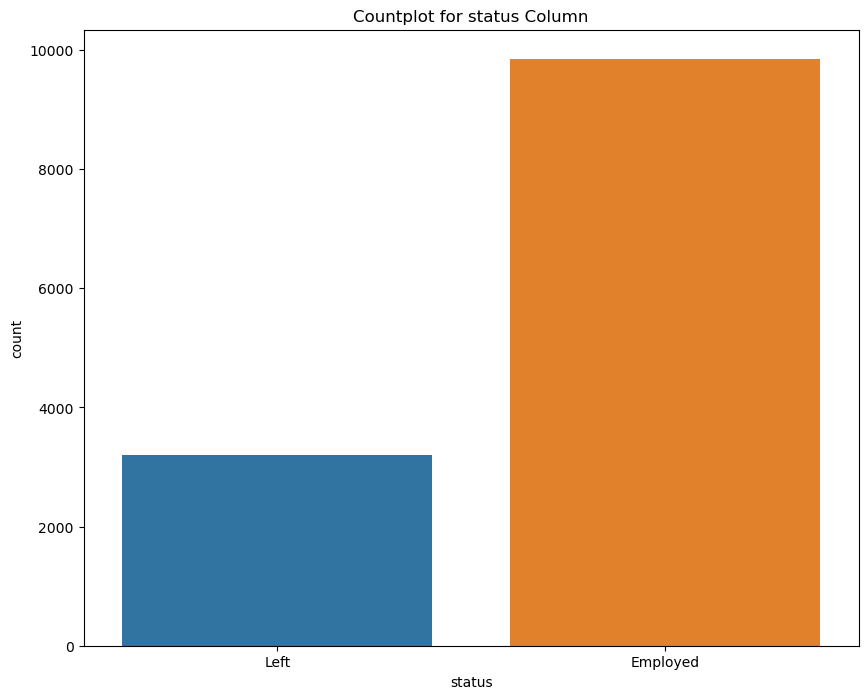

In [18]:
plt.figure(figsize = (10, 8))
Attrplot=sns.countplot(x = 'status', data = data)
plt.title("Countplot for status Column")
plt.show()

In [19]:
# Convert 'Left' for 1 and 'Employed' for 0
Y = np.where(data['status'].values == 'Left', 1, 0)

# dropping the target column and create the matrix of features
X = data.drop(['status'], axis=1)

In [20]:
# view the number of unique values each column
features=data.columns
for i in features:
    uniqueValues=data[i].nunique()
    print(i,uniqueValues)
    
data.dtypes

avg_monthly_hrs 249
department 13
filed_complaint 2
last_evaluation 11212
n_projects 7
recently_promoted 2
salary 3
satisfaction 12537
status 2
tenure 5


avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

Observation:

Our categorical colums are:

1.department
2.filed_complaint(Already 0 and 1)
3.recently_promoted(Already 0 and 1)
4.salary
All those fields are already objects and all others are numbers(float).

In [21]:
# make all categorial columns to separeted columns
X = pd.get_dummies(X, drop_first=True)
X.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,department_admin,department_engineering,department_finance,...,department_management,department_marketing,department_other,department_procurement,department_product,department_sales,department_support,department_temp,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,5.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.718477,3,0.0,0.834544,2.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,3.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,2.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,3.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [22]:
num_cols=['avg_monthly_hrs','last_evaluation','n_projects','satisfaction','tenure']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,department_admin,department_engineering,department_finance,...,department_management,department_marketing,department_other,department_procurement,department_product,department_sales,department_support,department_temp,salary_low,salary_medium
0,0.425923,0.0,1.331435,0.195792,0.0,0.845753,2.031287,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.641345,0.0,0.007830,-0.594889,0.0,0.864468,-1.294769,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,-0.298679,0.0,0.442176,-0.594889,0.0,0.866256,-0.186084,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.132165,0.0,-0.873718,0.195792,0.0,-0.785642,-1.294769,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.974270,0.0,0.790301,-0.594889,0.0,0.640977,-0.186084,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [23]:
# train test split


y_left = Y[Y == 1]
x_left = X[Y == 1]
y_stay = Y[Y == 0]
x_stay = X[Y == 0]

x_train_left, x_test_left, y_train_left, y_test_left = train_test_split(x_left,y_left , test_size = .25, random_state=45)
x_train_stay, x_test_stay, y_train_stay, y_test_stay = train_test_split(x_stay,y_stay , test_size = .25, random_state=45)
x_train = np.concatenate((x_train_left, x_train_stay), axis=0)
y_train = np.concatenate((y_train_left, y_train_stay), axis=0)
x_test = np.concatenate((x_test_left, x_test_stay), axis=0)
y_test = np.concatenate((y_test_left, y_test_stay), axis=0)

In [29]:
#Decision Tree
#creating a random search for some hyper parameters given in param_grid_1
dt=DecisionTreeClassifier()
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':np.arange(4,20,1),
    'min_samples_split':np.arange(0.001,0.1,0.01),
    'max_features':['sqrt'],
    'min_weight_fraction_leaf':np.arange(0.001,0.25,0.05)
}
r_search=RandomizedSearchCV(dt,param_distributions=param_grid,n_iter=10,verbose=1)
r_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'max_features': ['sqrt'],
                                        'min_samples_split': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
                                        'min_weight_fraction_leaf': array([0.001, 0.051, 0.101, 0.151, 0.201])},
                   verbose=1)

In [26]:
#getting best performing hyper parameters from random search 
r_search.best_params_

{'min_weight_fraction_leaf': 0.001,
 'min_samples_split': 0.071,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'gini'}

In [28]:
param_grid = {'min_weight_fraction_leaf': np.arange(0.001,0.01,0.001),
 'min_samples_split': np.arange(0.07,0.12,0.01),
 'max_features': ['sqrt'],
 'max_depth': np.arange(10,20,1),
 'criterion': ['entropy']}
dt=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt,param_grid = param_grid,cv=5,verbose=1,n_jobs=-1)
grid_search.fit(x_train,y_train)
grid_search.best_params_
y_predictions = grid_search.best_estimator_.predict(x_test)
print(classification_report(y_test,y_predictions))

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2462
           1       0.75      0.67      0.71       800

    accuracy                           0.87      3262
   macro avg       0.82      0.80      0.81      3262
weighted avg       0.86      0.87      0.86      3262



In [31]:
dt=DecisionTreeClassifier(criterion= 'entropy',max_depth= 17,max_features= 'sqrt',min_samples_split= 0.07,min_weight_fraction_leaf= 0.006)
dt.fit(x_train,y_train)
y_predictions = dt.predict(x_test)
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2462
           1       0.78      0.91      0.84       800

    accuracy                           0.92      3262
   macro avg       0.88      0.92      0.89      3262
weighted avg       0.92      0.92      0.92      3262



In [33]:
#Random Forest
dt=RandomForestClassifier()
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':np.arange(4,20,1),
    'min_samples_split':np.arange(0.001,0.1,0.01),
    'max_features':['sqrt'],
    'min_weight_fraction_leaf':np.arange(0.001,0.25,0.05),
    'n_estimators': np.arange(50,500,50)
}
r_search=RandomizedSearchCV(dt,param_distributions=param_grid,n_iter=50,verbose=1)
r_search.fit(x_train,y_train)
r_search.best_params_


Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'n_estimators': 350,
 'min_weight_fraction_leaf': 0.001,
 'min_samples_split': 0.001,
 'max_features': 'sqrt',
 'max_depth': 13,
 'criterion': 'gini'}

In [34]:
param_grid = {'min_weight_fraction_leaf': np.arange(0.001,0.005,0.001),
 'min_samples_split': np.arange(0.01,0.06,0.01),
 'max_features': ['sqrt'],
 'max_depth': np.arange(15,20,1),
 'criterion': ['entropy','gini'],
 'n_estimators': [100]}
dt=RandomForestClassifier()
grid_search=GridSearchCV(estimator=dt,param_grid = param_grid,cv=5,verbose=1,n_jobs=-1, scoring='recall')
grid_search.fit(x_train,y_train)
grid_search.best_params_#getting best parameters of grid search
m_best = grid_search.best_estimator_
rf_predictions_val_y=m_best.predict(x_test)
print(classification_report(y_test,rf_predictions_val_y))


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2462
           1       0.97      0.90      0.94       800

    accuracy                           0.97      3262
   macro avg       0.97      0.95      0.96      3262
weighted avg       0.97      0.97      0.97      3262



In [35]:
clf = RandomForestClassifier(max_depth=18, random_state=45)
clf.fit(x_train, y_train)
rf_predictions_val_y=clf.predict(x_test)
print(classification_report(y_test,rf_predictions_val_y))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2462
           1       0.97      0.93      0.95       800

    accuracy                           0.98      3262
   macro avg       0.98      0.96      0.97      3262
weighted avg       0.98      0.98      0.98      3262

